# Task 5 : 生成各种数据集

1. 数据库初始化（1.将样本保存至数据库。2.随机从传感器流量中采样，生成正常流量，保存至数据库）
2. 计算攻击分数（1.将没有流量的时间点，填充为正常流量。2.使用滑动窗口计算流量）
4. ML训练时，只选择7种类型的特征。支持7种类型（int和bool保存为int、category，binary，string, datetime保存为text、float保存为Float）
5. 生成数据集（packet-label），用于ML训练：单数据包-->标签 (选择7种类型的特征)
6. 生成数据集（packet-score），用于ML训练：多数据包-->分数 (选择7种类型的特征，将滑动窗口内的特征进行合并)
7. 生成数据集（text-label），用于LLM训练：单数据包文本-->标签 (生成packet的文本)
8. 生成数据集（text-score），用于LLM训练：多数据包文本-->分数 (生成滑动窗口内的packet文本)

In [1]:
import os,json,sys,logging
from numpy import nan
sys.path.append("./share")
sys.path.append("./common")
import pandas as pd
import json,logging
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
from SHSample import CSHSample
from IoTSample import CIoTSample
from IoTDatabase import CIoTDbFeatures,CIoTDbSample,import_sample
from IoTScore import CIoTScore,CIoTScoreTest,Create_Score_Sample,Create_Normal_Sample
from IoTPrompt import create_model_samples
from IoTCommon import CIoTCommon
from sklearn.metrics import jaccard_score
from scipy.stats import skew, kurtosis
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(suppress=True)

## 数据库初始化

### 将原始样本导入至数据库

### 随机从传感器流量中采样，生成正常流量，保存至数据库

## 计算攻击分数（填充正常流量）
1. 计算攻击分数（1.将没有流量的时间点，填充为正常流量。2.使用滑动窗口计算流量）

## 生成数据集
1. ML训练时，只选择7种类型的特征。支持7种类型（int和bool保存为int、category，binary，string, datetime保存为text、float保存为Float）
2. 生成数据集（packet-label），用于ML训练：单数据包-->标签 (选择7种类型的特征)
3. 生成数据集（packet-score），用于ML训练：多数据包-->分数 (选择7种类型的特征，将滑动窗口内的特征进行合并)
4. 生成数据集（text-label），用于LLM训练：单数据包文本-->标签 (生成packet的文本)
5. 生成数据集（text-score），用于LLM训练：多数据包文本-->分数 (生成滑动窗口内的packet文本)

# 查看分数的分布

In [2]:
for attack in tqdm(CIoTSample().get_attack_type()):
    print(attack)

  0%|          | 0/14 [00:00<?, ?it/s]

Port Scanning attack
Vulnerability scanner attack
Password attacks
Uploading attack
DDoS UDP Flood Attacks
DDoS ICMP Flood Attacks
DDoS TCP SYN Flood Attacks
Ransomware attack
DDoS HTTP Flood Attacks
Backdoor_attack
MITM (ARP spoofing + DNS) Attack
SQL injection attack
XSS attacks
OS Fingerprinting attack


## 调试

In [3]:
attack = 'XSS attacks'
ioTScore = CIoTScoreTest(attack)
df_result = ioTScore.get_result()

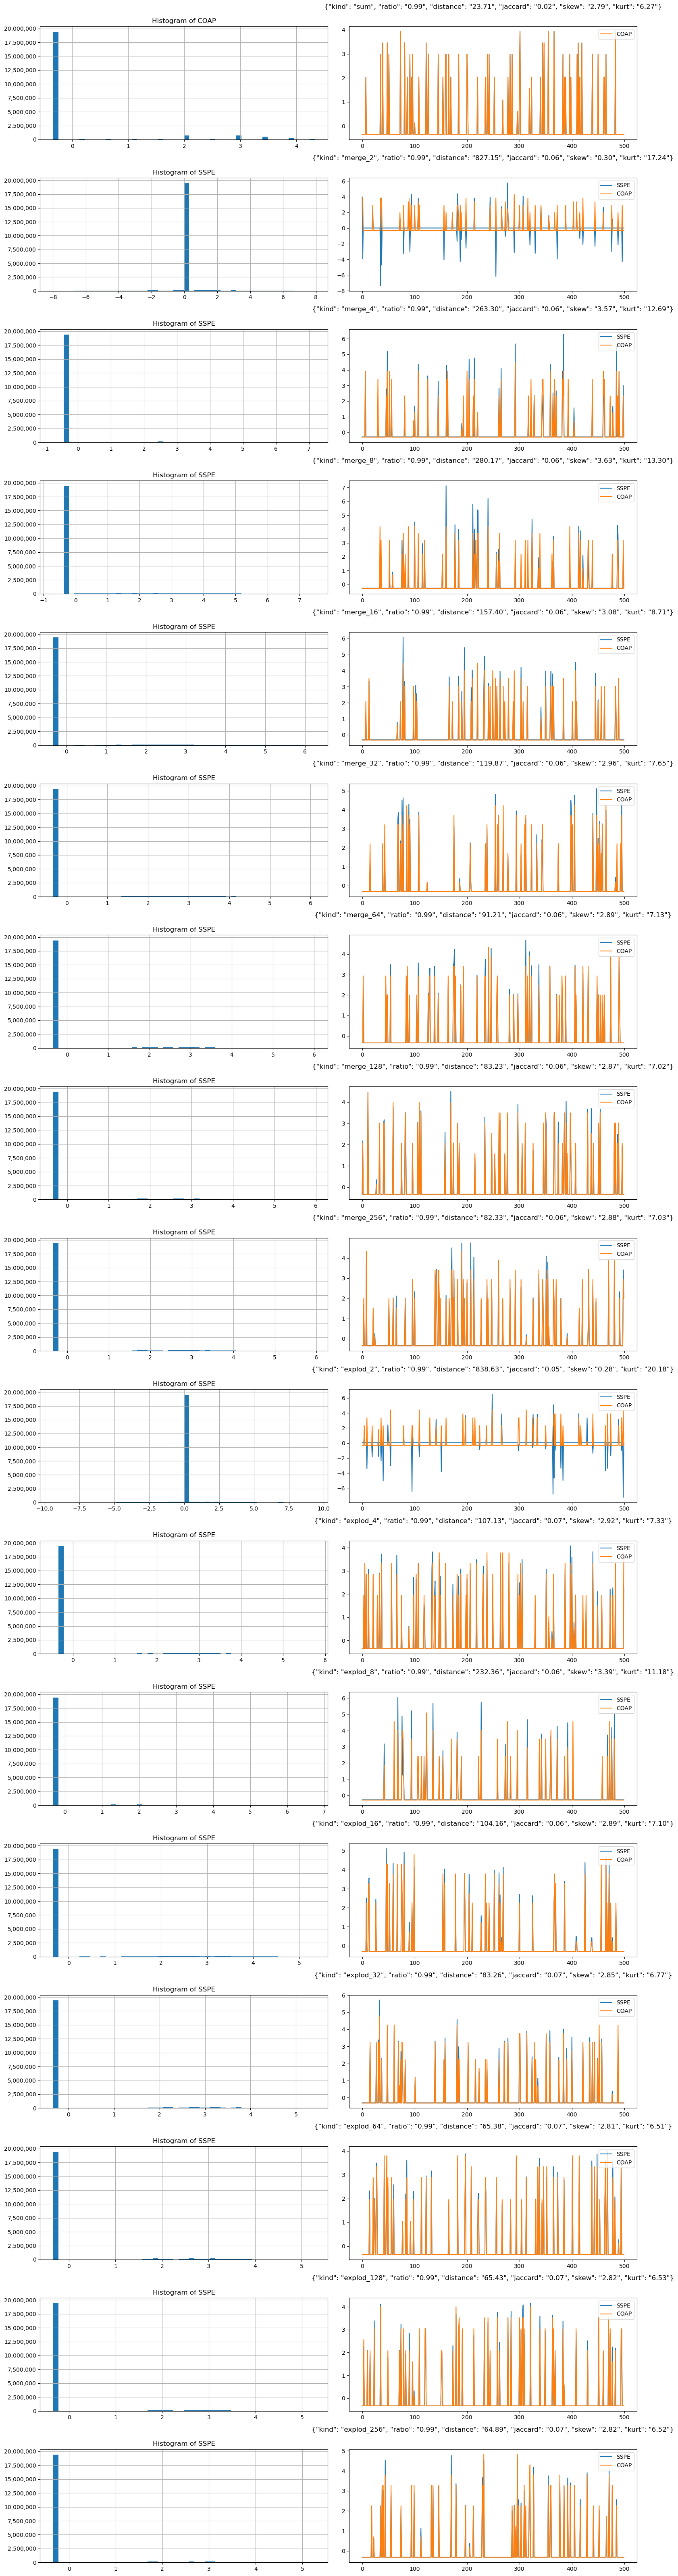

In [4]:
ioTScore.show_result(df_result,n_samples=500,nbins=50,min_score = None)

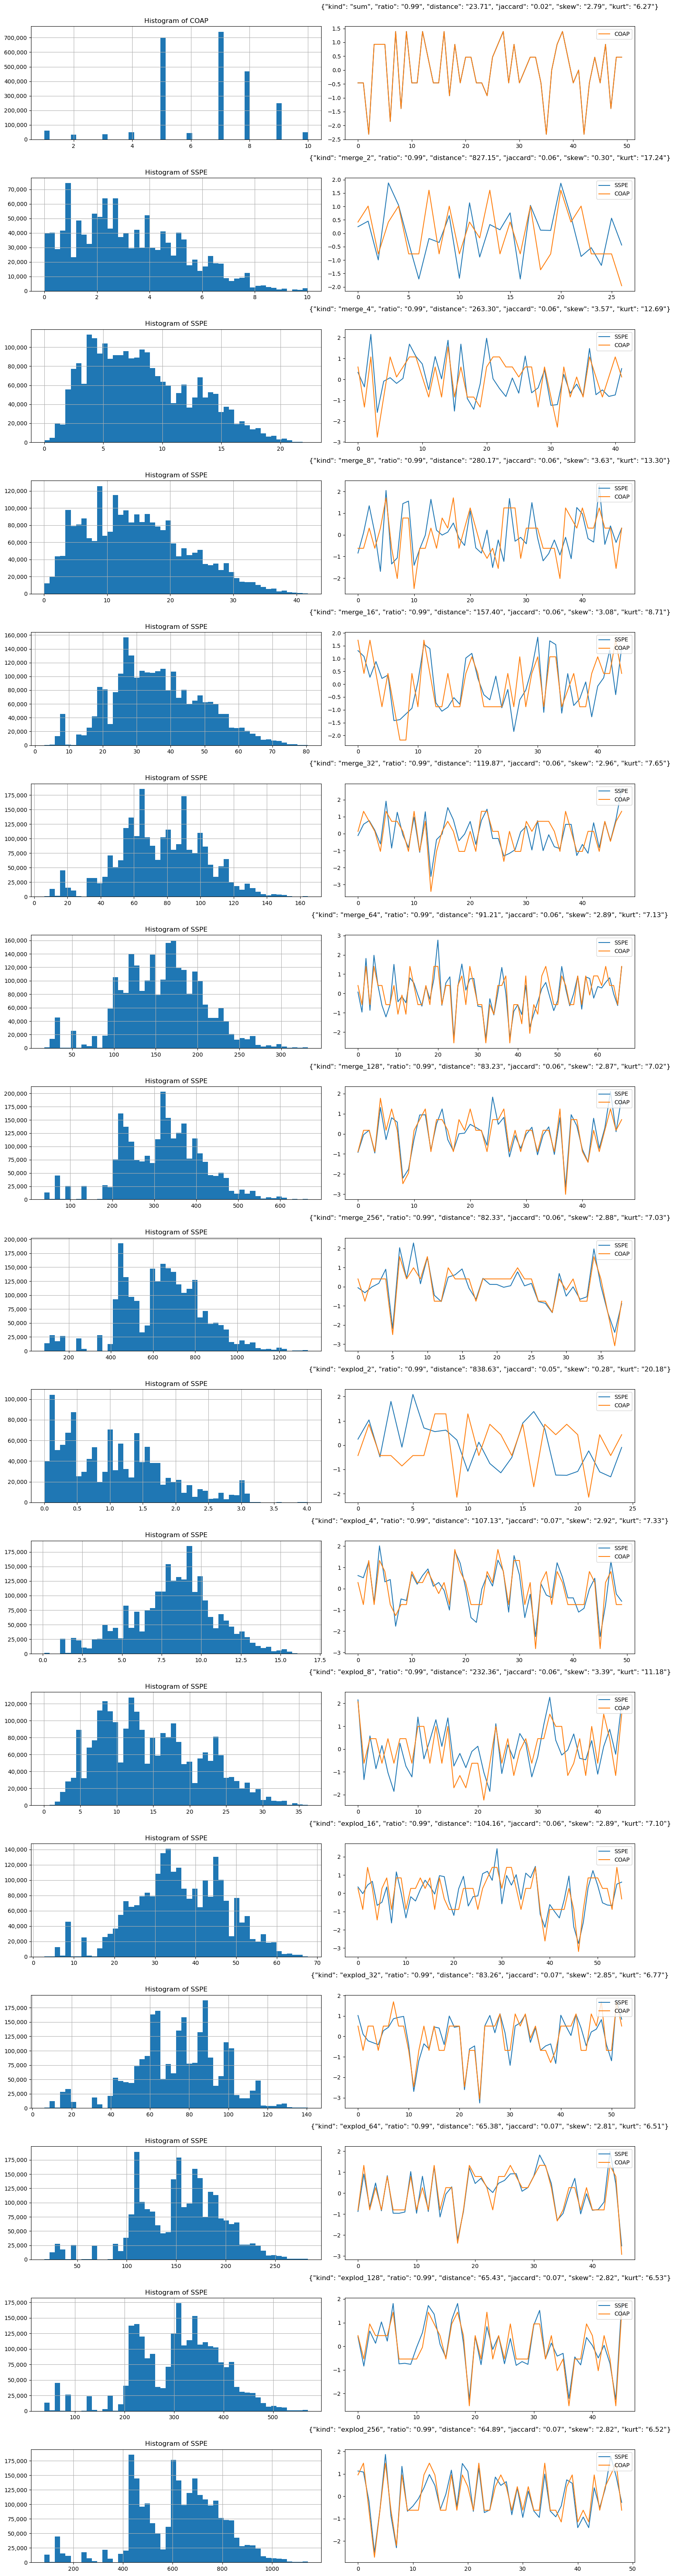

In [26]:
ioTScore.show_result(df_result,n_samples=500,nbins=50,min_score = 0)

In [37]:
df_tmp = CSHSample.resample_group_balance(ioTScore.get_score(),max_samples=None)